                     
## Project
### Doctors segmentation

#### Goal of project

The goal  of project is to identify the most potential doctors . The doctor segmentation is allowing pharma sales team to focus on the most potential doctors   for increasing effectiveness.

#### Data
Open data  Національної служби здоров’я МОЗ
https://nszu.gov.ua/e-data/open-data  and test market data

#### Algorithm
I use K-mean clustering algorithm


# 1.Analyze data

Total potential - number of declarations which doctor signed. 
This is the potential number of patients.

Prescription  - number products which doctors already prescribed. This is test data

Market share - market data. This is test  data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('Potential_HCPs_updated1.csv')
df.head()

,ID_doctors,TotalPotential,Potential40+,Prescription,MarketShare,Gender,DoctorName,Oblast,City,Type of city
0,1873,2657,1884,150,14,Male,Левадна Вікторія Леонідівна,ВІННИЦЬКА,БРОННИЦЯ,село
1,25895,2157,1682,150,14,Female,Зленко Світлана Миколаївна,ВІННИЦЬКА,ВАПНЯРКА,смт
2,16697,2004,1657,150,14,Female,Рибак Галина Іванівна,ВІННИЦЬКА,БАЛАНІВКА,село
3,6524,2063,1589,150,14,Female,Юраш Наталія Василівна,ВІННИЦЬКА,ВЕРБКА,село
4,6479,2087,1584,150,14,Male,Колеснік Юрій Миколайович,ВІННИЦЬКА,ВИЩЕОЛЬЧЕДАЇВ,село


In [8]:
df.describe()

,ID_doctors,TotalPotential,Potential40+,Prescription,MarketShare
count,18594.000000,18594.000000,18594.000000,18594.000000,18594.000000
mean,37047.489620,1496.032376,883.694686,55.550500,14.594547
std,74582.308075,586.427605,437.415756,36.794078,3.777723
min,6.000000,1.000000,1.000000,1.000000,5.000000
25%,7695.250000,1138.000000,563.000000,45.000000,14.000000
50%,15837.500000,1756.000000,945.000000,60.000000,15.000000
75%,24537.500000,1903.000000,1230.000000,70.000000,17.000000
max,338860.000000,3633.000000,2176.000000,150.000000,19.000000


C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MON_UA1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

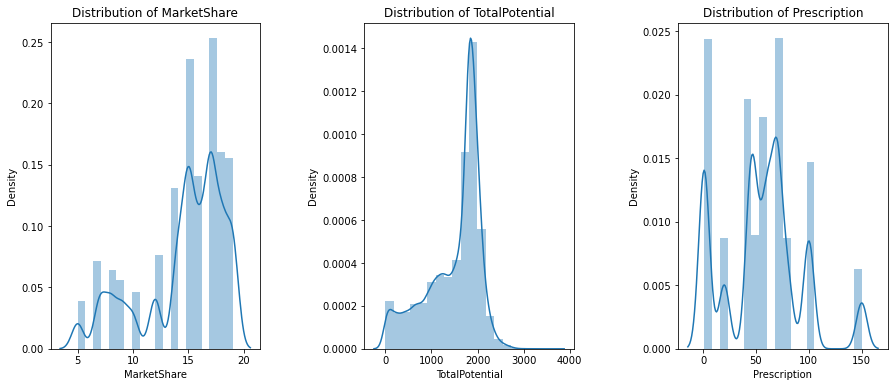

In [9]:
plt.figure (1, figsize=(15,6))
n=0
for x in ['MarketShare', 'TotalPotential','Prescription']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title ('Distribution of {}'.format (x))
plt.show()

Most doctors have MarketShare 


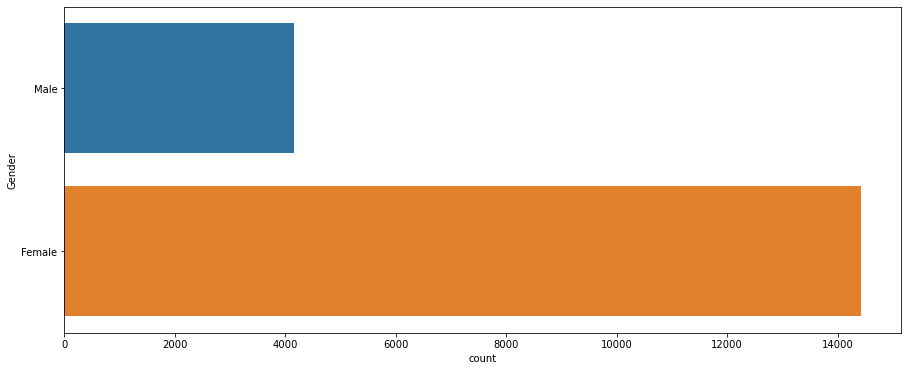

In [10]:
plt.figure (figsize=(15,6))
sns.countplot(y='Gender', data = df)
plt.show ()

Number of women is more than man

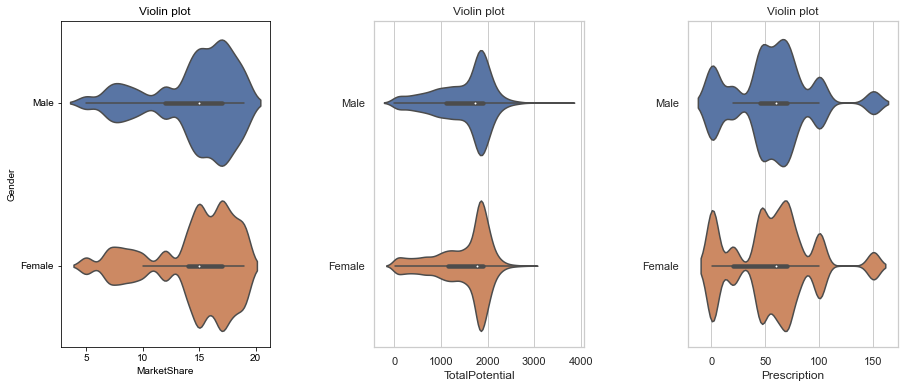

In [11]:
plt.figure (1, figsize=(15,6))
n=0
for cols in ['MarketShare', 'TotalPotential','Prescription']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set (style = "whitegrid")
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot (x = cols, y = 'Gender', data = df)
    plt.ylabel ('Gender' if n== 1 else '')
    plt.title ('Violin plot')
plt.show()

Potential, Market Share and Prescription are the same for man and women

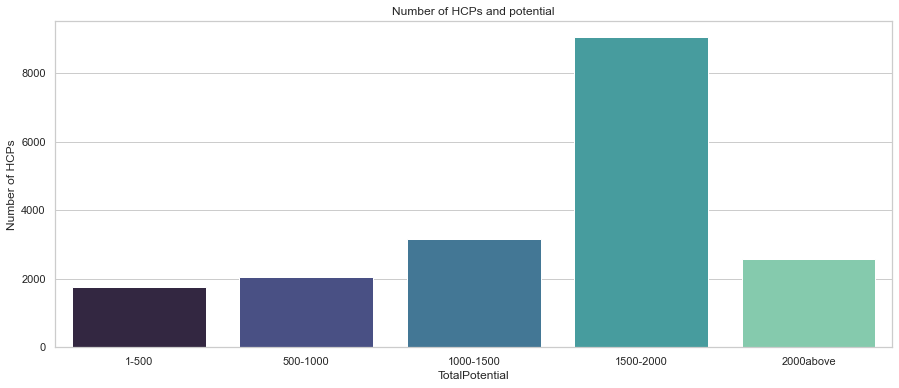

In [12]:
Potential_500 = df.TotalPotential[(df.TotalPotential >= 1) & (df.TotalPotential <= 500)]
Potential_500_1000 = df.TotalPotential[(df.TotalPotential >= 500) & (df.TotalPotential <= 1000)] 
Potential_1000_1500 = df.TotalPotential[(df.TotalPotential >= 1000) & (df.TotalPotential <= 1500)]
Potential_1500_2000 = df.TotalPotential[(df.TotalPotential >= 1500) & (df.TotalPotential <= 2000)]
Potential_2000above = df.TotalPotential[(df.TotalPotential >= 2000)]
                                        
agex = ["1-500" , "500-1000" , "1000-1500" , "1500-2000","2000above"]
agey = [len(Potential_500.values),len(Potential_500_1000.values),len(Potential_1000_1500.values),len(Potential_1500_2000.values),len(Potential_2000above.values)]
                                                                                                     
plt.figure(figsize = (15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title ("Number of HCPs and potential")
plt.xlabel ("TotalPotential")
plt.ylabel ("Number of HCPs")
plt.show ()

The most doctors have Potentials beetween 1500-2000. Lets examine the relationship beetween Potential and Prescription

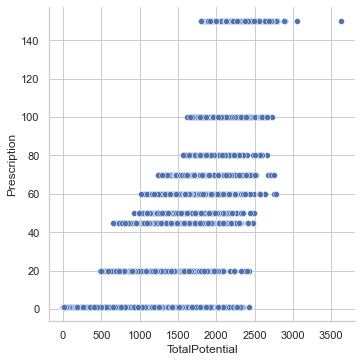

In [56]:
sns.relplot(x="TotalPotential", y="Prescription",data=df)

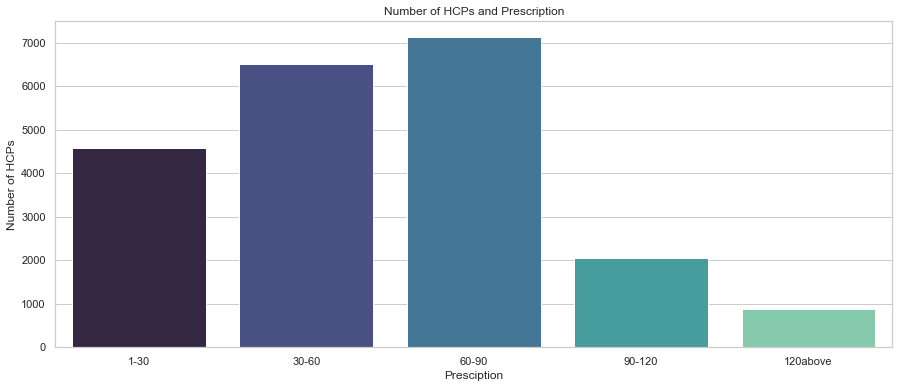

In [51]:
Prescription_30 = df.Prescription [(df.Prescription >= 1) & (df.Prescription <= 30)]
Prescription_30_60 = df.Prescription[(df.Prescription >= 30) & (df.Prescription <= 60)] 
Prescription_60_90 = df.Prescription[(df.Prescription >= 60) & (df.Prescription <= 90)]
Prescription_90_120 = df.Prescription[(df.Prescription >= 90) & (df.Prescription <= 120)]
Prescription_120above = df.Prescription[(df.Prescription >= 120)]
                                        
agex = ["1-30" , "30-60" , "60-90" , "90-120","120above"]
agey = [len(Prescription_30.values),len(Prescription_30_60.values),len(Prescription_60_90.values),len(Prescription_90_120.values),len(Prescription_120above.values)]
                                                                                                     
plt.figure(figsize = (15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title ("Number of HCPs and Prescription")
plt.xlabel ("Presciption")
plt.ylabel ("Number of HCPs")
plt.show ()

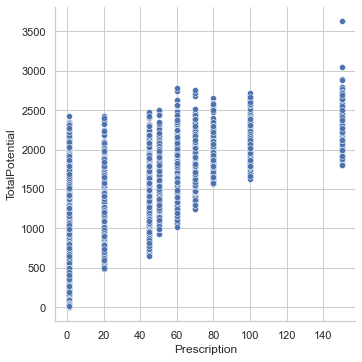

In [45]:
sns.relplot(x="Prescription", y="TotalPotential",data=df)

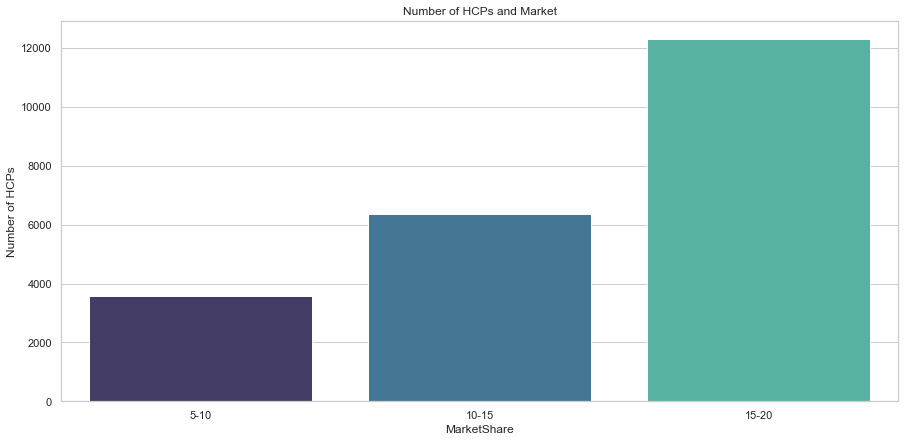

In [44]:
MarketShare_5_10 = df.MarketShare[(df.MarketShare >= 5) & (df.MarketShare <= 10)]
MarketShare_10_15 = df.MarketShare[(df.MarketShare >= 10) & (df.MarketShare <= 15)] 
MarketShare_15_20 = df.MarketShare[(df.MarketShare >= 15) & (df.MarketShare <= 20)]


agex = ["5-10", "10-15", "15-20"]
agey = [len(MarketShare_5_10.values),len(MarketShare_10_15.values),len(MarketShare_15_20.values)]
plt.figure (figsize = (15,7))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title ("Number of HCPs and MarketShare")
plt.xlabel ("MarketShare")
plt.ylabel ("Number of HCPs")
plt.show ()

The most doctors have MarketShare beetween 15-20

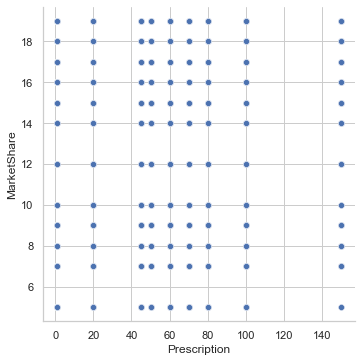

In [52]:
sns.relplot(x="Prescription", y="MarketShare",data=df)

## 2. Clustering and visualization

In [36]:
from sklearn.cluster import KMeans

In [78]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict (X1)

print(label)

[3 3 3 ... 0 0 1]


In [59]:
print (kmeans.cluster_centers_)

[[1756.29763144   62.99206143]
 [ 359.73853732    3.04812429]
 [1117.6          35.88480204]
 [2065.44559229   91.90587695]]


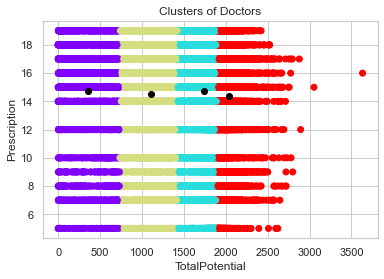

In [79]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color= 'black')
plt.title ('Clusters of Doctors')
plt.xlabel ('TotalPotential')
plt.ylabel ('Prescription')
plt.show()        

There are 4 clusters based on Total Potential and Prescription
Cluster 1 - Based on cluster center, Doctor with Potential  360 and Prescription 3.  
            These are doctors with low Potential and Prescription.
Cluster 2 - Based on cluster center, Doctor with Potential  1120 and Prescription 36. 
            This are doctors  with medium Potential         
Cluster 3 - Based on cluster center,Doctor with Potential  1756 and Prescription 63.  
            This are doctors with high Potential and Prescription
Cluster 4 - Based on cluster center, Doctor with Potential  2065 and Prescription 91.  
            These are doctors with very high Potential and Prescription

### Conclusion:

 So we can identify 4 groups of doctors:

Cluster 1 (Target C) - doctors with low potential and prescription

Cluster 2 (Target B) - doctors with medium potential and prescription

Cluster 3 (Target A) - potential doctors with high potential and prescription

Cluster 4 (Target A+) - highly potential doctors with very high potential and prescription
